In statistics, an outlier is an observation point that is distant from other observations.
1) IQR method--
iqr = q3 - a1

lower range = q1 - 1.5*iqr

upper range = q3 + 1.5*iqr

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('D:\Python\pandas\Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [4]:
#we are going to apply iqr on the price column
#q1 is value of 25%
#q3 is value of 75%
q1=df['price'].quantile(0.25)
q3=df['price'].quantile(0.75)
print(q1,q3)


50.0 120.0


In [7]:
iqr = q3-q1
lower_limit = q1-1.5*iqr
upper_limit = q3+1.5*iqr
print(lower_limit,upper_limit)

-55.0 225.0


In [11]:
df[(df['price']<lower_limit) | (df['price']>upper_limit)].describe()

,bath,balcony,price
count,1259.000000,1052.00000,1276.000000
mean,4.412232,1.83270,425.746865
std,1.968159,0.93487,324.368791
min,1.000000,0.00000,226.000000
25%,3.000000,1.00000,260.000000
50%,4.000000,2.00000,325.000000
75%,5.000000,3.00000,450.000000
max,40.000000,3.00000,3600.000000


In [12]:
filtered_df = df[(df['price']>lower_limit) &(df['price']<upper_limit)]
filtered_df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,NaN,1262,2.0,2.0,47.00
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,SoosePr,1715,3.0,3.0,112.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00


Z score method

In [14]:
data = pd.read_csv('D:\Python\pandas\weight-height.csv')
data

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [ ]:
#not working

from scipy.stats import norm
plt.hist(data['Height'],bins=20,rwidth=0.5)
plt.xlabel('height (inches)')
plt.ylabel('count')

rng=np.arange(data['Height'].min(),data['Height'].max(),0.1)
plt.plot(rng,norm.pdf(data['Height'].mean(),data['Height'].std()))

plt.show()

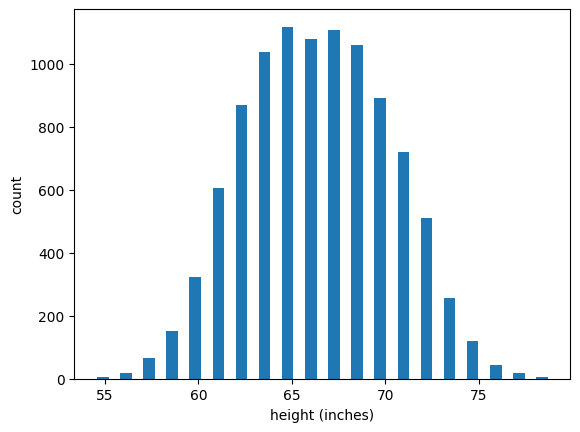

In [21]:
plt.hist(data['Height'],bins=20,rwidth=0.5)
plt.xlabel('height (inches)')
plt.ylabel('count')
plt.show()

In [23]:
#using 3 standard method to remove outlieres-
mean = data['Height'].mean()
sd = data['Height'].std()
print(mean,sd)

66.36755975482124 3.8475281207732293


In [24]:
lower_lim = mean - 3*sd
upper_lim = mean + 3*sd
print(lower_lim,upper_lim)

54.82497539250156 77.91014411714093


In [27]:
filt = (data['Height']>lower_lim) & (data['Height']<upper_lim)
data[filt]

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


z score tells us how far we are from our mean in terms of std

z=(x-mean)/std

In [31]:
#
data['z score height'] = (data['Height'] - data['Height'].mean())/data['Height'].std()
data

,Gender,Height,Weight,z sore height,z score height
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.050658
9996,Female,67.067155,170.867906,0.181830,0.181830
9997,Female,63.867992,128.475319,-0.649655,-0.649655
9998,Female,69.034243,163.852461,0.693090,0.693090


In [32]:
data[data['z score height']>3] 

,Gender,Height,Weight,z sore height,z score height
994,Male,78.095867,255.690835,3.048271,3.048271
1317,Male,78.462053,227.342565,3.143445,3.143445
2014,Male,78.998742,269.989699,3.282934,3.282934
3285,Male,78.528210,253.889004,3.160640,3.160640
3757,Male,78.621374,245.733783,3.184854,3.184854


In [33]:
data[data['z score height']<-3]


,Gender,Height,Weight,z sore height,z score height
6624,Female,54.616858,71.393749,-3.054091,-3.054091
9285,Female,54.263133,64.700127,-3.146027,-3.146027


In [35]:
filt = (data['z score height']>-3) & (data['z score height']<3) 
filtered_data = data[filt]
filtered_data

,Gender,Height,Weight,z sore height,z score height
0,Male,73.847017,241.893563,1.943964,1.943964
1,Male,68.781904,162.310473,0.627505,0.627505
2,Male,74.110105,212.740856,2.012343,2.012343
3,Male,71.730978,220.042470,1.393991,1.393991
4,Male,69.881796,206.349801,0.913375,0.913375
...,...,...,...,...,...
9995,Female,66.172652,136.777454,-0.050658,-0.050658
9996,Female,67.067155,170.867906,0.181830,0.181830
9997,Female,63.867992,128.475319,-0.649655,-0.649655
9998,Female,69.034243,163.852461,0.693090,0.693090


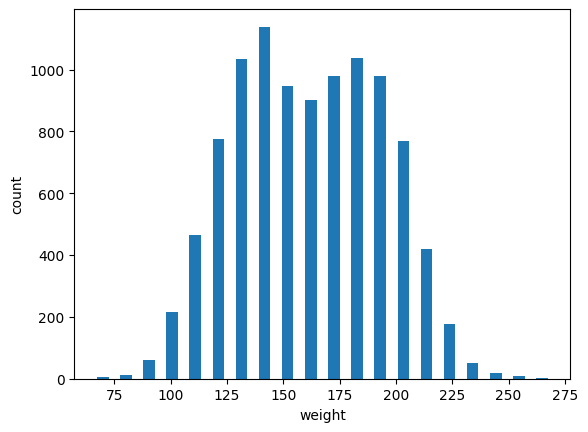

In [17]:
plt.hist(data['Weight'],bins=20,rwidth=0.5)
plt.xlabel('weight')
plt.ylabel('count')
plt.show()